# Exploratory Data Analysis

## Import Libraries

In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## Load Dataset

In [2]:
post_df = pd.read_csv('data/job_postings.csv')
key_info_post_df = post_df[['job_link', 'job_title', 'company', 'job_location', 'first_seen', 'search_city', 'search_country', 'job_type']].copy()
key_info_post_df.head()

,job_link,job_title,company,job_location,first_seen,search_city,search_country,job_type
0,https://www.linkedin.com/jobs/view/senior-mach...,Senior Machine Learning Engineer,Jobs for Humanity,"New Haven, CT",2024-01-14,East Haven,United States,Onsite
1,https://www.linkedin.com/jobs/view/principal-s...,"Principal Software Engineer, ML Accelerators",Aurora,"San Francisco, CA",2024-01-14,El Cerrito,United States,Onsite
2,https://www.linkedin.com/jobs/view/senior-etl-...,Senior ETL Data Warehouse Specialist,Adame Services LLC,"New York, NY",2024-01-14,Middletown,United States,Onsite
3,https://www.linkedin.com/jobs/view/senior-data...,Senior Data Warehouse Developer / Architect,Morph Enterprise,"Harrisburg, PA",2024-01-12,Lebanon,United States,Onsite
4,https://www.linkedin.com/jobs/view/lead-data-e...,Lead Data Engineer,Dice,"Plano, TX",2024-01-14,McKinney,United States,Onsite


In [3]:
skill_df = pd.read_csv('data/job_skills.csv')
skill_df.head()

,job_link,job_skills
0,https://www.linkedin.com/jobs/view/senior-mach...,"Machine Learning, Programming, Python, Scala, ..."
1,https://www.linkedin.com/jobs/view/principal-s...,"C++, Python, PyTorch, TensorFlow, MXNet, CUDA,..."
2,https://www.linkedin.com/jobs/view/senior-etl-...,"ETL, Data Integration, Data Transformation, Da..."
3,https://www.linkedin.com/jobs/view/senior-data...,"Data Lakes, Data Bricks, Azure Data Factory Pi..."
4,https://www.linkedin.com/jobs/view/lead-data-e...,"Java, Scala, Python, RDBMS, NoSQL, Redshift, S..."


In [4]:
merged_df = key_info_post_df.merge(skill_df, on='job_link')
merged_df.head()

,job_link,job_title,company,job_location,first_seen,search_city,search_country,job_type,job_skills
0,https://www.linkedin.com/jobs/view/senior-mach...,Senior Machine Learning Engineer,Jobs for Humanity,"New Haven, CT",2024-01-14,East Haven,United States,Onsite,"Machine Learning, Programming, Python, Scala, ..."
1,https://www.linkedin.com/jobs/view/principal-s...,"Principal Software Engineer, ML Accelerators",Aurora,"San Francisco, CA",2024-01-14,El Cerrito,United States,Onsite,"C++, Python, PyTorch, TensorFlow, MXNet, CUDA,..."
2,https://www.linkedin.com/jobs/view/senior-etl-...,Senior ETL Data Warehouse Specialist,Adame Services LLC,"New York, NY",2024-01-14,Middletown,United States,Onsite,"ETL, Data Integration, Data Transformation, Da..."
3,https://www.linkedin.com/jobs/view/senior-data...,Senior Data Warehouse Developer / Architect,Morph Enterprise,"Harrisburg, PA",2024-01-12,Lebanon,United States,Onsite,"Data Lakes, Data Bricks, Azure Data Factory Pi..."
4,https://www.linkedin.com/jobs/view/lead-data-e...,Lead Data Engineer,Dice,"Plano, TX",2024-01-14,McKinney,United States,Onsite,"Java, Scala, Python, RDBMS, NoSQL, Redshift, S..."


In [5]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12217 entries, 0 to 12216
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   job_link        12217 non-null  object
 1   job_title       12217 non-null  object
 2   company         12217 non-null  object
 3   job_location    12216 non-null  object
 4   first_seen      12217 non-null  object
 5   search_city     12217 non-null  object
 6   search_country  12217 non-null  object
 7   job_type        12217 non-null  object
 8   job_skills      12212 non-null  object
dtypes: object(9)
memory usage: 954.5+ KB


## Filter Jobs with Data Science/Scientist Title in US

### Filter Jobs

In [6]:
titles = ['Data Sci']
filter_jobs = merged_df[(merged_df['job_title'].str.contains('|'.join(titles))) & (merged_df['search_country'] == 'United States')].copy()
filter_jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 880 entries, 30 to 12214
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   job_link        880 non-null    object
 1   job_title       880 non-null    object
 2   company         880 non-null    object
 3   job_location    880 non-null    object
 4   first_seen      880 non-null    object
 5   search_city     880 non-null    object
 6   search_country  880 non-null    object
 7   job_type        880 non-null    object
 8   job_skills      880 non-null    object
dtypes: object(9)
memory usage: 68.8+ KB


### Preprocess

In [7]:
filter_jobs[['job_loc_city', 'job_loc_state']] = filter_jobs['job_location'].str.split(', ', expand=True)
filter_jobs.dropna(how='any', inplace=True) # Drop rows with missing full address (city + state)
filter_jobs['job_skills'] = filter_jobs['job_skills'].str.split(', ', expand=False) # Convert string to list of skills
filter_jobs.head()

,job_link,job_title,company,job_location,first_seen,search_city,search_country,job_type,job_skills,job_loc_city,job_loc_state
30,https://www.linkedin.com/jobs/view/data-scient...,Data Scientist,Futran Solutions,"Dallas, TX",2024-01-12,Arlington,United States,Onsite,"[Data science, Machine learning, Artificial in...",Dallas,TX
34,https://www.linkedin.com/jobs/view/data-scient...,Data Scientist,RAND Corporation,"Washington, DC",2024-01-16,Clinton,United States,Onsite,"[Data Management, Statistical Analysis, SAS, R...",Washington,DC
40,https://www.linkedin.com/jobs/view/sr-data-sci...,Sr. Data Scientist,ANSER,"Washington, DC",2024-01-14,West Springfield,United States,Onsite,"[Data Analytics, Data Engineering, Data Mining...",Washington,DC
43,https://www.linkedin.com/jobs/view/sr-analyst-...,Sr Analyst IT - Data Science,Reynolds American Inc.,"Winston-Salem, NC",2024-01-14,Winston-Salem,United States,Onsite,"[Data Analysis, Machine Learning, Python, PySp...",Winston-Salem,NC
47,https://www.linkedin.com/jobs/view/staff-data-...,"Staff Data Scientist, Financial Strategy",Stripe,"Seattle, WA",2024-01-16,Kent,United States,Onsite,"[Data Science, Quantitative Field, Technical L...",Seattle,WA


In [8]:
filter_jobs['job_title'].value_counts()

Data Scientist                               103
Senior Data Scientist                         91
Lead Data Scientist                           34
Sr. Data Scientist                            21
Sr Data Scientist                             16
                                            ... 
Data Scientist - Back End Data Engineer        1
Machine Learning Data Scientist                1
Data Science Developer                         1
Technical Writer – Data Science (1106564)      1
Senior Data Scientist - Statistics             1
Name: job_title, Length: 429, dtype: int64

### Group by Job Title

In [9]:
pr_he_ma_df = filter_jobs[filter_jobs['job_title'].str.contains('|'.join(['Principal', 'Head', 'Manager']))].copy()
len(pr_he_ma_df), pr_he_ma_df['job_title'].value_counts()

(102,
 Data Science Manager, Growth                             8
 Principal Data Scientist                                 8
 Data Science Manager                                     7
 Data Scientist, Senior Manager                           4
 Senior Manager, Data Science                             4
                                                         ..
 Principal Statistician/Data Scientist                    1
 Expression of Interest: Data Science Manager             1
 Senior Manager Data Science (multiple openings) - IHM    1
 Sr Manager Advanced Analytics and Data Science           1
 Principal Data Scientist, Community                      1
 Name: job_title, Length: 66, dtype: int64)

In [10]:
ds_df = filter_jobs[filter_jobs['job_title'].str.contains('|'.join(['^Data Sci', '^Staff Data Sci']))].copy()
ds_df = ds_df[~ds_df.isin(pr_he_ma_df)].dropna(how='all')
len(ds_df), ds_df['job_title'].value_counts()

(237,
 Data Scientist                                                  103
 Data Scientist/Senior Data Scientist                             11
 Staff Data Scientist                                              8
 Data Scientist Lead - Property & Casualty Loss/Risk Modeling      5
 Data Scientist – Fraud Specialist                                 5
                                                                ... 
 Data Scientist - Back End Data Engineer                           1
 Data Science Developer                                            1
 Data Science and Analyst                                          1
 Data Scientist, Supply and Operation Technology                   1
 Staff Data Scientist - LLM                                        1
 Name: job_title, Length: 89, dtype: int64)

In [11]:
sr_ds_df = filter_jobs[filter_jobs['job_title'].str.contains('|'.join(['^Se', '^Sr']))].copy()
sr_ds_df = sr_ds_df[~sr_ds_df.isin(pr_he_ma_df)].dropna(how='all')
len(sr_ds_df), sr_ds_df['job_title'].value_counts()

(292,
 Senior Data Scientist                                                             91
 Sr. Data Scientist                                                                21
 Sr Data Scientist                                                                 16
 Senior Data Scientist with Security Clearance                                      8
 Senior Data Scientist, Product Growth                                              5
                                                                                   ..
 Sr. Data Scientist, Amazon Robotics (AR)                                           1
 Sr. Data Scientist (1020250)                                                       1
 Sr. Human Resource Business Partner (Technology, Engineering and Data Science)     1
 Senior Associate Data Scientist - Machine Learning, Financial Services             1
 Senior Data Scientist - Statistics                                                 1
 Name: job_title, Length: 132, dtype: int64)

In [12]:
le_ds_df = filter_jobs[filter_jobs['job_title'].str.contains('|'.join(['^Lead']))].copy()
le_ds_df = le_ds_df[~le_ds_df.isin(pr_he_ma_df)].dropna(how='all')
len(le_ds_df), le_ds_df['job_title'].value_counts()

(43,
 Lead Data Scientist                                            34
 Lead Data Science Analyst (multiple openings) - IHM             2
 Lead Data Scientist with Security Clearance                     1
 Lead Data Scientist - Clinical                                  1
 Lead Data Scientist (Hybrid)                                    1
 Lead Data Science Analyst (Multiple openings) - IHM             1
 Lead Data Scientist- AD Tech                                    1
 Lead Data Scientist - Top Regional Bank                         1
 Lead Data Scientist - Property & Casualty Insurance Pricing     1
 Name: job_title, dtype: int64)

In [13]:
ot_ds_df = filter_jobs[(~filter_jobs.isin(pr_he_ma_df)) & (~filter_jobs.isin(ds_df)) & (~filter_jobs.isin(sr_ds_df)) & (~filter_jobs.isin(le_ds_df))].dropna().copy()
len(ot_ds_df), ot_ds_df['job_title'].value_counts()

(167,
 (Global Oil Gas) Senior Data Scientist Expert                                  13
 (USA) Senior, Data Scientist                                                    6
 Assistant Professor of Data Science                                             3
 Cleared Data Scientist - Workforce Analytics                                    3
 Assistant Professor of Statistics & Data Science                                2
                                                                                ..
 Statistician/Data Scientist Fellowship                                          1
 Asst Prof Computer Science in Data Science &                                    1
 Assistant/Associate Professor - Biostatistics and Data Science                  1
 Professional Track Faculty Positions in Statistics and Data Sciences (2024)     1
 Adjunct Faculty, Data Science                                                   1
 Name: job_title, Length: 133, dtype: int64)

## Some Stats

### Count jobs across experience levels

In [14]:
count_jobs_dict = dict()
count_jobs_dict['Principle/Head/Manager'] = len(pr_he_ma_df)
count_jobs_dict['Data Science/Scientist'] = len(ds_df)
count_jobs_dict['Senior Data Science/Scientist'] = len(sr_ds_df)
count_jobs_dict['Lead Data Science/Scientist'] = len(le_ds_df)
count_jobs_dict['Other'] = len(ot_ds_df)

count_jobs_df = pd.DataFrame.from_dict(count_jobs_dict, orient='index').rename(columns={0: 'Count'})
count_jobs_df

,Count
Principle/Head/Manager,102
Data Science/Scientist,237
Senior Data Science/Scientist,292
Lead Data Science/Scientist,43
Other,167


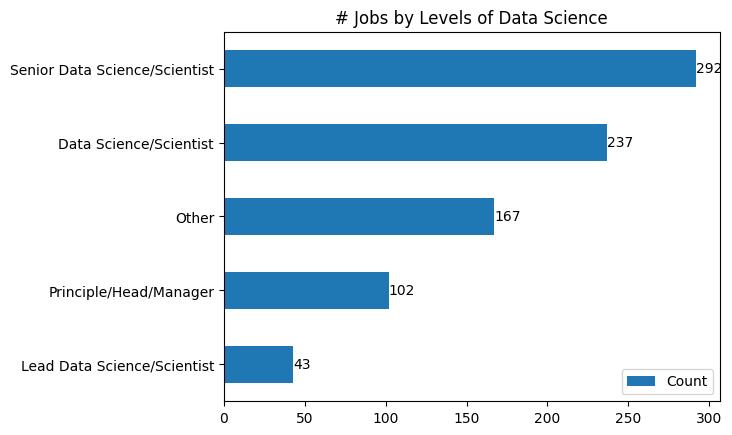

In [15]:
ax = count_jobs_df.sort_values(by='Count').plot.barh()
ax.bar_label(ax.containers[0])
plt.title('# Jobs by Levels of Data Science')
plt.show()

### Count skills

#### All DS jobs

In [16]:
skill_counts = pd.DataFrame(filter_jobs['job_skills'].values.tolist()).stack().value_counts()
all_ds_skills_freq = skill_counts.head(20)
all_ds_skills_freq

Python                     679
SQL                        507
Data Science               485
Machine Learning           443
R                          401
Statistics                 319
Data Visualization         235
Communication              211
Tableau                    199
Spark                      192
Data Analysis              167
Machine learning           161
AWS                        156
Data Mining                139
Hadoop                     131
Mathematics                126
Artificial Intelligence    122
Computer Science           122
Data Analytics             117
Java                       113
dtype: int64

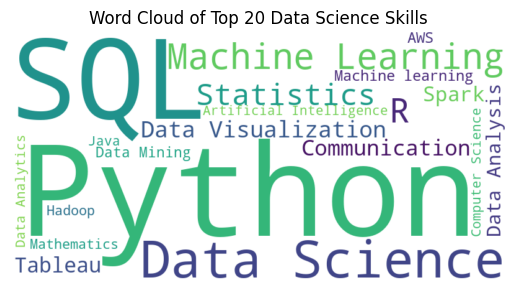

In [17]:
all_wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(all_ds_skills_freq)

plt.imshow(all_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top 20 Data Science Skills', fontsize=12)
plt.show()

In [18]:
top_5_skills = all_ds_skills_freq.index.to_list()[:5]
top_5_skills

['Python', 'SQL', 'Data Science', 'Machine Learning', 'R']

#### Per each level

##### Principal/Head/Manager

In [19]:
pd.DataFrame(pr_he_ma_df['job_skills'].values.tolist()).stack().loc[lambda x: ~x.str.contains('|'.join(top_5_skills))].value_counts().head(5)

Tableau               34
AWS                   34
Communication         28
Statistics            27
Data Visualization    25
dtype: int64

In [20]:
pd.DataFrame(pr_he_ma_df['job_skills'].values.tolist()).stack().value_counts().head(10)

Python              86
SQL                 74
Data Science        63
R                   60
Machine Learning    43
Tableau             34
AWS                 34
Communication       28
Statistics          27
Spark               25
dtype: int64

##### DS

In [21]:
pd.DataFrame(ds_df['job_skills'].values.tolist()).stack().loc[lambda x: ~x.str.contains('|'.join(top_5_skills))].value_counts().head(5)

Statistics            87
Data Visualization    81
Communication         61
Data Analysis         61
Tableau               56
dtype: int64

In [22]:
pd.DataFrame(ds_df['job_skills'].values.tolist()).stack().value_counts().head(10)

Python                195
SQL                   156
Machine Learning      131
Data Science          129
R                     109
Statistics             87
Data Visualization     81
Data Analysis          61
Communication          61
Tableau                56
dtype: int64

##### Sr. Data Scientist

In [23]:
pd.DataFrame(sr_ds_df['job_skills'].values.tolist()).stack().loc[lambda x: ~x.str.contains('|'.join(top_5_skills))].value_counts().head(5)

Statistics            128
Spark                  81
Communication          76
Data Visualization     71
Tableau                67
dtype: int64

In [24]:
pd.DataFrame(sr_ds_df['job_skills'].values.tolist()).stack().value_counts().head(10)

Python                251
SQL                   184
Data Science          172
Machine Learning      172
R                     146
Statistics            128
Spark                  81
Communication          76
Data Visualization     71
Tableau                67
dtype: int64

##### Lead Data Scientist

In [25]:
pd.DataFrame(le_ds_df['job_skills'].values.tolist()).stack().loc[lambda x: ~x.str.contains('|'.join(top_5_skills))].value_counts().head(5)

Statistics       25
Spark            17
Communication    14
Tableau          14
AWS              13
dtype: int64

In [26]:
pd.DataFrame(le_ds_df['job_skills'].values.tolist()).stack().value_counts().head(10)

Python              39
Machine Learning    26
SQL                 26
Statistics          25
R                   24
Data Science        24
Spark               17
Communication       14
Tableau             14
AWS                 13
dtype: int64